# Homework 1

## Markets

### UChicago Financial Mathematics

#### September 2024

* Mark Hendricks
* hendricks@uchicago.edu

#### This assignment is not submitted, graded, or for credit. 
Rather, it is assigned for learning purposes.

***

# 1. Exploring Money-Market Rates

Use the data in `data/ref_rates.xlsx` to explore several key money-market rates.
* SOFR
* Fed funds
* 3-month T-bill yield


In [1]:
# PACKAGES
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg


In [2]:
# Read data
ref_rates = pd.read_excel("../data/ref_rates.xlsx", sheet_name='data').set_index('date')

### 1.
Plot the time series.


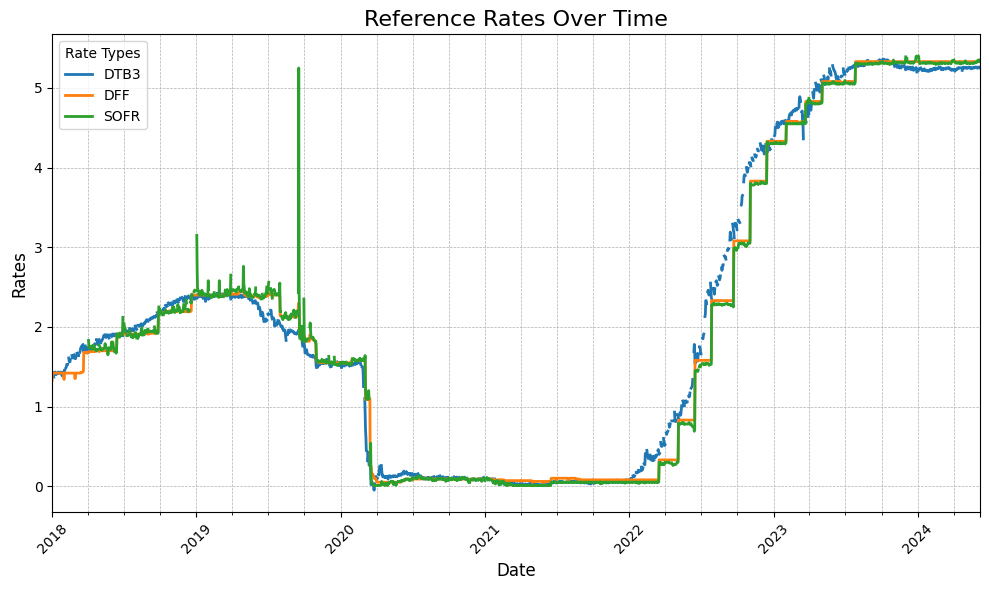

In [3]:
# Create the plot
ax = ref_rates.plot(figsize=(10, 6), linewidth=2)

# Add a title and labels
ax.set_title('Reference Rates Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Rates', fontsize=12)

# Customize the grid and legend
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(title='Rate Types', loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### 2.
Calculate the correlation between the three rates (filtering to the dates for which they all have reported values.)

Do this correlation analysis for the data in
* levels (as provided)
* differences (day-over-day changes)

In [4]:
ref_rates.dropna().corr()

,DTB3,DFF,SOFR
DTB3,1.000000,0.994584,0.992659
DFF,0.994584,1.000000,0.998913
SOFR,0.992659,0.998913,1.000000


In [5]:
ref_rates.diff().dropna().corr()

,DTB3,DFF,SOFR
DTB3,1.000000,-0.007353,0.037524
DFF,-0.007353,1.000000,0.459211
SOFR,0.037524,0.459211,1.000000


### 3.

Estimate an autoregression for SOFR:

$$r_{t} = \alpha + \beta\, r_{t-1} + \epsilon_{t}$$

Report the estimated regression beta and r-squared.

Comment on what this regression tells us about the nature of interest rates. 
* That is, can we forecast the next period's rate? 
* Does the series have **autocorrelation**?


In [6]:
model = AutoReg(ref_rates['SOFR'].dropna(), lags=1).fit()

print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   SOFR   No. Observations:                 1545
Model:                     AutoReg(1)   Log Likelihood                1084.586
Method:               Conditional MLE   S.D. of innovations              0.120
Date:                Mon, 09 Sep 2024   AIC                          -2163.172
Time:                        18:12:52   BIC                          -2147.145
Sample:                             1   HQIC                         -2157.210
                                 1545                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.005      0.983      0.325      -0.004       0.013
SOFR.L1        0.9990      0.002    632.261      0.000       0.996       1.002
                                    Roots           

/Users/charleston/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The t-stat is extremely high, larger than 600 hundred. This tells us that the previous period of the interest rate is a good explanatory variable to the present.

To test for autocorrelation, we can perform a Durbin Watson test. As we can see below, the DW is larger than 2.5, which means that there is significative autocorrelation between SOFR and its one day lag. 

In [7]:
residuals = model.resid
dw_stat = sm.stats.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.5239841076905045




### 4.

Estimate an autoregression for returns of the S&P 500 ETF, `SPY`, rather than using SOFR. Get data from 
* `data/spy_data.xlsx`

Are SPY returns autocorrelated? And SPY prices?

In [8]:
# Read data
spy_data = pd.read_excel("../data/spy_data.xlsx", sheet_name='prices').set_index('date')

model_spy = AutoReg(spy_data['SPY'].dropna(), lags=1).fit()

print(model_spy.summary())

                            AutoReg Model Results                             
Dep. Variable:                    SPY   No. Observations:                 7681
Model:                     AutoReg(1)   Log Likelihood              -16587.021
Method:               Conditional MLE   S.D. of innovations              2.098
Date:                Mon, 09 Sep 2024   AIC                          33180.042
Time:                        18:12:53   BIC                          33200.881
Sample:                             1   HQIC                         33187.189
                                 7681                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.038      0.053      0.957      -0.073       0.077
SPY.L1         1.0004      0.000   5085.650      0.000       1.000       1.001
                                    Roots           

/Users/charleston/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
residuals_spy = model_spy.resid
dw_stat = sm.stats.durbin_watson(residuals_spy)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.1369522881626333


The t-stat is extremely high, larger than a thousand. This tells us that the previous period of the interest rate is a good explanatory variable to the present.

To test for autocorrelation, we can perform a Durbin Watson test. As we can see below, the DW is larger than 2, which means that there is some autocorrelation between the SP500 and its one day lag.

***